In [1]:
# This is a python 3 script

GSS30-IRS1 [1.0265305523852155, 1.1967031154239371, 1.6525284879700768]
RCrA-IRS5A [1.0630328106306945, 1.1315603623722159, 1.3696372720817391]
WL12 [1.0658349639604883, 1.1795182951208503, 1.5544868365162248]
L1157 [0.88814655673490295, 1.0238192013210212, 1.2499526279539201]
B1-a [0.96930624346651972, 1.1511839311917937, 1.5630237070177919]
L1455-IRS3 [0.96288513101165973, 1.0754205476633589, 1.1663323990719603]
RCrA-IRS7C [1.0583199216274193, 1.1882984142806348, 1.610635391778519]
RCrA-IRS7B [1.1350205745981607, 1.2433990122014991, 1.6502607947801953]
TMC1 [0.85637697588957395, 1.0621488350593302, 1.4117465104117266]
B1-c [0.94115926331937272, 1.026415385086562, 1.3611805371906085]
L1551-IRS5 [0.96001505768336226, 1.0445727449209452, 1.3347461641114415]
BHR71 [0.88019845186446033, 1.0159638235903434, 1.2623573713064893]
DKCha [0.87783200402997597, 1.0273250965542062, 1.3918963895200682]
L1014 [0.91807657310684054, 1.040351275983455, 1.1958665580424235]
TMC1A [0.94460787807967617, 1.

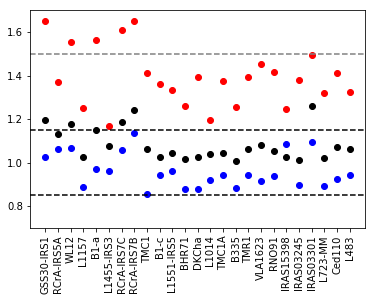

In [2]:
%matplotlib inline
import os
from glob import glob
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

# archive_dir = '/Users/yaolun/data/CDF_archive_v2/'
archive_dir = '/home/bettyjo/yaolun/CDF_archive_v2/'
band = [250, 350, 500]

fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['b','k','r']

path_list = glob(archive_dir+'*/')
obj_list = []
for path in path_list:
# this is for directories cleaning
#     if os.path.exists(path+'data'):
#         os.rmdir(path+'data')
#     if not os.path.exists(path+'spire/data/'+os.path.basename(path[:-1])+'_spire_corrected.txt'):
#         continue
#     file_dum = glob(path+'spire/data/*spire_sect.txt')
#     obsid_dum = os.path.basename(file_dum[0])[:10]
#     if os.path.exists(path+'spire/data/'+obsid_dum+'spire_sect.txt'):
#         os.remove(path+'spire/data/'+obsid_dum+'_spire_sect.txt')
#         os.rename(path+'spire/data/'+obsid_dum+'spire_sect.txt', path+'spire/data/'+obsid_dum+'_spire_sect.txt')
    
    # photometry compare with spectroscopy - SPIRE
    if not os.path.exists(path+'spire/data/'+os.path.basename(path[:-1])+'_spire_phot.txt'):
        continue
    spec_dum = ascii.read(path+'spire/data/'+os.path.basename(path[:-1])+'_spire_corrected.txt')
    phot_dum = ascii.read(path+'spire/data/'+os.path.basename(path[:-1])+'_spire_phot.txt', data_start=4)
    
    obj_list.append(os.path.basename(path[:-1]))
    
    ratio = []
    for b in band:
        spec_flux = np.mean(spec_dum['Flux_Density(Jy)'][(spec_dum['Wavelength(um)'] >= b-10) & (spec_dum['Wavelength(um)'] <= b+10)])
        ratio.append(np.mean(phot_dum['flux(Jy)'][phot_dum['wavelength(um)'] == b])/spec_flux)
        ax.plot(len(obj_list), ratio[-1], 'o', color=colors[band.index(b)])
        
    print(os.path.basename(path[:-1]), ratio)

ax.axhline(1.15, color='k', linestyle='--')
ax.axhline(0.85, color='k', linestyle='--')
ax.axhline(1.5, color='Gray', linestyle='--')
ax.set_ylim([0.7, 1.7])
    
plt.xticks(list(range(1,len(obj_list)+1)), [obj for obj in obj_list], rotation='vertical')

print(len(obj_list))

/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


GSS30-IRS1 [nan, 0.7862812859909365, 0.71228651100572959]
RCrA-IRS5A [0.31752220005044274, 0.92860372734826435, 0.80617979389040062]
WL12 [0.6214817525378018, nan, 0.36976740885735887]


/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/bettyjo/yao

L1157 [nan, 1.101397825686083, 1.4164365195071578]
B1-a [nan, 0.48376602185025691, 0.46149990313262984]
L1455-IRS3 [nan, 0.48825599437997341, 1.9750521927064404]
RCrA-IRS7C [1.2301682836730579, 1.1512909875511461, 1.0564555403126548]
RCrA-IRS7B [nan, 1.0549011954366656, 1.0938197184662115]
No photometry for TMC1
B1-c [0.83874944673999829, nan, 0.95195179262710961]


/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


No photometry for L1551-IRS5
BHR71 [1.0838518003687172, 1.1068874675341562, 1.132819239889183]
DKCha [nan, 0.97180429404401625, 1.1236196813500037]


/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/bettyjo/yao

L1014 [nan, 0.63315785490797372, 0.99266720322972479]
No photometry for TMC1A
B335 [nan, 0.98650852418451318, 1.1698963063151173]
TMR1 [nan, 1.0542309876340372, 1.1108543116977037]
14


/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/bettyjo/yaolun/anaconda/envs/astroconda3/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


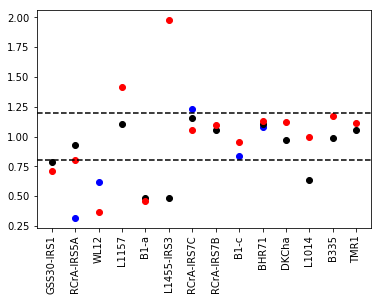

In [14]:
%matplotlib inline
import os
from glob import glob
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

# archive_dir = '/Users/yaolun/data/CDF_archive_v2/'
archive_dir = '/home/bettyjo/yaolun/CDF_archive_v2/'
band = [70., 100., 160.]

fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['b','k','r']

path_list = glob(archive_dir+'*/')
obj_list = []
for path in path_list:
    # photometry compare with spectroscopy - PACS
    if not os.path.exists(path+'pacs/data/'+os.path.basename(path[:-1])+'_pacs_phot.txt'):
        continue
    spec_dum = ascii.read(path+'pacs/data/'+os.path.basename(path[:-1])+'_pacs_weighted.txt')
    try:
        phot_dum = ascii.read(path+'pacs/data/'+os.path.basename(path[:-1])+'_pacs_phot.txt', data_start=4)
    except IndexError:
        print('No photometry for', os.path.basename(path[:-1]))
        continue
        
    
    obj_list.append(os.path.basename(path[:-1]))
    
    ratio = []
    for b in band:
        spec_flux = np.nanmean(spec_dum['Flux_Density(Jy)'][(spec_dum['Wavelength(um)'] >= b-10) & (spec_dum['Wavelength(um)'] <= b+10)])
        ratio.append(np.mean(phot_dum['flux(Jy)'][phot_dum['wavelength(um)'] == b])/spec_flux)
        ax.plot(len(obj_list), ratio[-1], 'o', color=colors[band.index(b)])
        
    print(os.path.basename(path[:-1]), ratio)

ax.axhline(1.20, color='k', linestyle='--')
ax.axhline(0.80, color='k', linestyle='--')
# ax.axhline(1.5, color='Gray', linestyle='--')
# ax.set_ylim([0.7, 1.7])
    
plt.xticks(list(range(1,len(obj_list)+1)), [obj for obj in obj_list], rotation='vertical')

print(len(obj_list))